## Homework 3
## Team 5
## Members: Anais Huang, Zhikai Li, Zihan Qu

# A.Anomaly Detection

In [3]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix


In [5]:
df = pd.read_csv('20 Percent Training Set.csv')
df

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.0,1.00,neptune,19
25187,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.0,0.00,warezclient,12
25188,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
25189,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,20


In [6]:
## Number of NaN values in df

nan_count = df.isna().sum()

print("Number of NaN values in each column:\n", nan_count)

Number of NaN values in each column:
 0           0
tcp         0
ftp_data    0
SF          0
491         0
0.1         0
0.2         0
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0
0.8         0
0.9         0
0.10        0
0.11        0
0.12        0
0.13        0
0.14        0
0.15        0
0.16        0
0.18        0
2           0
2.1         0
0.19        0
0.20        0
0.21        0
0.22        0
1           0
0.23        0
0.24        0
150         0
25          0
0.17        0
0.03        0
0.17.1      0
0.25        0
0.26        0
0.27        0
0.05        0
0.28        0
normal      0
20          0
dtype: int64


In [9]:
test_df = pd.read_csv('KDDTest+.csv')
test_df.columns = df.columns
test_df

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal,20
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22538,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22540,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [10]:
## Number of NaN values in test_df

nan_count = test_df.isna().sum()

print("Number of NaN values in each column:\n", nan_count)

Number of NaN values in each column:
 0           0
tcp         0
ftp_data    0
SF          0
491         0
0.1         0
0.2         0
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0
0.8         0
0.9         0
0.10        0
0.11        0
0.12        0
0.13        0
0.14        0
0.15        0
0.16        0
0.18        0
2           0
2.1         0
0.19        0
0.20        0
0.21        0
0.22        0
1           0
0.23        0
0.24        0
150         0
25          0
0.17        0
0.03        0
0.17.1      0
0.25        0
0.26        0
0.27        0
0.05        0
0.28        0
normal      0
20          0
dtype: int64


### (1) Extract normal instances from the training dataset; process the data according to the need as necessary; normalize the attribute values for better classification performance.

In [11]:
from sklearn.preprocessing import MinMaxScaler

normal_instances = df[df['normal'] == 'normal']
# Select only numerical columns and normalize
numerical_columns = normal_instances.select_dtypes(include=['number'])
scaler = MinMaxScaler()
normalized_normal_instances = pd.DataFrame(scaler.fit_transform(numerical_columns), columns=numerical_columns.columns)

### (2) For every instance in the testing dataset, find the nearest “neighbor” instance in the normal profile and calculate the corresponding distance to it.

### We used the default distance in Kmeans, which is the Minkowski distance.

In [12]:
from sklearn.neighbors import NearestNeighbors

# Prepare testing dataset

numerical_test_columns = test_df.select_dtypes(include=['number'])
normalized_test_instances = pd.DataFrame(scaler.transform(numerical_test_columns), columns=numerical_test_columns.columns)
# Set the column names for normalized_test_instances using numerical_test_columns
normalized_test_instances.columns = numerical_test_columns.columns

# Find nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=1)
nearest_neighbors.fit(normalized_normal_instances)
distances, indices = nearest_neighbors.kneighbors(normalized_test_instances)


### (3) Vary the control threshold to appropriately cover the value range of this distance (using at least 10 different values), and classify each new instance as normal or attack (binary classification) accordingly.
### (4) Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) pair for each control threshold value used and plot the Receiver Operating Characteristic (ROC) curve.

In [29]:
distances.max()

7.238524931990537

[0.9982492276004119, 0.0572605561277034, 0.03419155509783728, 0.022245108135942326, 0.013079299691040165, 0.009165808444902163, 0.00576725025746653, 0.003913491246138002, 0.003913491246138002, 0.003913491246138002, 0.003810504634397528, 0.003810504634397528, 0.003810504634397528, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.8641677057356608, 0.7207761845386533, 0.6091022443890274, 0.5319513715710723, 0.4545667082294264, 0.16443266832917705, 0.04192643391521197, 0.0020261845386533666, 0.0012468827930174563, 0.0009351620947630922, 0.0009351620947630922, 0.0009351620947630922, 0.00023379052369077306, 0.00015586034912718204, 0.00015586034912718204, 0.00015586034912718204, 7.793017456359102e-05, 7.793017456359102e-05, 7.793017456359102e-05, 7.793017456359102e-05, 7.793017456359102e-05, 7.793017456359102e-05, 7.793017456359102e-05, 7.793017456359102e-05, 7.793017456359102e-05, 7.793017456359102e-05, 7.793017456359102e-05, 7.793017456359102e-05,

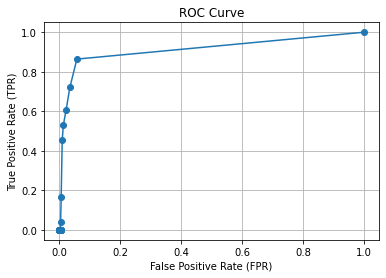

AUC: 0.9117107101902812


In [13]:
import numpy as np

thresholds = np.linspace(distances.min(), distances.max(), num=30)

# Initialize lists to store FPR and TPR values
fpr_list = []
tpr_list = []
results = []
# Iterate through each threshold and classify instances
for threshold in thresholds:
    predictions = (distances > threshold).flatten()
    results.append(predictions)
    binary_predictions = (distances > threshold).astype(int)
    conf_matrix = confusion_matrix((test_df['normal'] != 'normal').values, binary_predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Calculate FPR and TPR
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
print(fpr_list)
print(tpr_list)
# Plot the ROC curve
plt.plot(fpr_list, tpr_list, marker='o')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()

# Calculate AUC
roc_auc = auc(fpr_list, tpr_list)
print("AUC:", roc_auc)


### (5) Please calculate the Area Under the Curve (AUC) for this ROC.

In [14]:
print("AUC:", roc_auc)

AUC: 0.9117107101902812


### (6) Please find the “best” control threshold setting and explain how you determine it. 
### Answer: We use the threshold with the best F1 score.

In [15]:
from sklearn.metrics import f1_score

test_labels = (test_df['normal'] != 'normal').values
f1_scores = [f1_score(test_labels, res) for res in results]
best_threshold = thresholds[np.argmax(f1_scores)]
print("thresholds:", thresholds)
print("f1_scores:", f1_scores)
print("Best control threshold:", best_threshold)
print("Best F1:", np.max(f1_scores))

thresholds: [0.         0.24960431 0.49920862 0.74881292 0.99841723 1.24802154
 1.49762585 1.74723016 1.99683446 2.24643877 2.49604308 2.74564739
 2.9952517  3.244856   3.49446031 3.74406462 3.99366893 4.24327324
 4.49287754 4.74248185 4.99208616 5.24169047 5.49129478 5.74089908
 5.99050339 6.2401077  6.48971201 6.73931632 6.98892062 7.23852493]
f1_scores: [0.7258534377916679, 0.9060750909016627, 0.8253245884085129, 0.7492331288343558, 0.69001769016932, 0.6220539618214781, 0.2813708494465929, 0.0802505966587112, 0.004032258064516129, 0.0024833152258264784, 0.0018632093781538698, 0.0018632093781538698, 0.0018632093781538698, 0.0004674717569146863, 0.0003116721209287829, 0.0003116721209287829, 0.0003116721209287829, 0.0001558482038494506, 0.0001558482038494506, 0.0001558482038494506, 0.0001558482038494506, 0.0001558482038494506, 0.0001558482038494506, 0.0001558482038494506, 0.0001558482038494506, 0.0001558482038494506, 0.0001558482038494506, 0.0001558482038494506, 0.0001558482038494506, 

# B. Misuse Detection

### (1) Use the whole training dataset (both normal and intrusive instances) for detection. Again, normalize the attribute values for better classification performance.

In [16]:
# Normalize the whole training dataset
all_numerical_columns = df.select_dtypes(include=['number'])
scaler_all = MinMaxScaler()
normalized_all_instances = pd.DataFrame(scaler_all.fit_transform(all_numerical_columns), columns=all_numerical_columns.columns)


### (2) Select different k’s (using at least the first 10 odd integer numbers) used in k-NN classification, through majority voting, to classify each instance in the testing dataset as normal or intrusive (binary classification).
### (3) Calculate the FPR and TPR pair for each k used and plot the ROC curve over these different k’s.
### (4) Please calculate the AUC for this ROC.

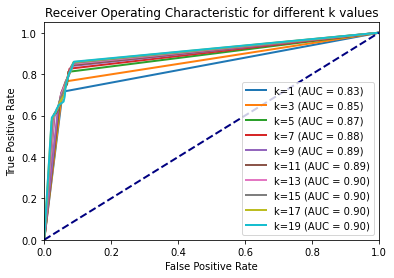

In [17]:
from sklearn.neighbors import KNeighborsClassifier

ks = list(range(1, 21, 2))
fpr_k = []
tpr_k = []
auc_k = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    ## be careful, it is binary classification
    knn.fit(normalized_all_instances, df['normal'] != 'normal')
    knn_predictions = knn.predict_proba(normalized_test_instances)[:, 1]
    fpr, tpr, _ = roc_curve(test_labels, knn_predictions)
    fpr_k.append(fpr)
    tpr_k.append(tpr)
    auc_k.append(auc(fpr, tpr))

plt.figure()
for i, k in enumerate(ks):
    plt.plot(fpr_k[i], tpr_k[i], lw=2, label='k=%d (AUC = %0.2f)' % (k, auc_k[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for different k values')
plt.legend(loc="lower right")
plt.show()
    


In [18]:
print("k values selected", ks)
print("AUC for different k values:", auc_k)


k values selected [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
AUC for different k values: [0.8299821940385903, 0.852710100071654, 0.8743454708041944, 0.881531262921481, 0.8875382146782888, 0.8920786064254913, 0.8953190289595271, 0.8979820860117984, 0.9000984319903126, 0.900725204079143]


### (5) Now, use the nearest neighbor method, i.e., k=1, to find the attack category as one of the four attack categories or normal category of each testing instance, and show the resulting confusion matrix.

In [19]:
# Define a function to map labels to attack categories
# be careful, it is guess_passwd rather than gusee_password, and missing mailbomb in test data

attack_mapping = {
    'back': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos',
    'smurf': 'dos', 'teardrop': 'dos', 'apache2': 'dos', 'udpstorm': 'dos',
    'processtable': 'dos', 'worm': 'dos', 'mailbomb': 'dos',

    'satan': 'probe', 'ipsweep': 'probe', 'nmap': 'probe', 'portsweep': 'probe', 'mscan': 'probe',
    'saint': 'probe',

    'guess_passwd': 'r2l', 'ftp_write': 'r2l', 'imap': 'r2l', 'phf': 'r2l',
    'multihop': 'r2l', 'warezmaster': 'r2l', 'warezclient': 'r2l', 'spy': 'r2l',
    'xlock': 'r2l', 'xsnoop': 'r2l', 'snmpguess': 'r2l', 'snmpgetattack': 'r2l',
    'httptunnel': 'r2l', 'sendmail': 'r2l', 'named': 'r2l',

    'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'rootkit': 'u2r', 'perl': 'u2r',
    'sqlattack': 'u2r', 'xterm': 'u2r', 'ps': 'u2r',

    'normal' : 'normal'
}


### check whether there is some label missing, and we found "guess_passwd" (not guess password) and "mailbomb" missing, it should be a kind of "dos".

In [20]:
unique_classes = df['normal'].unique()

for cls in unique_classes:
    cls_lower = cls.lower()
    if cls_lower not in attack_mapping:
        print(f"The class '{cls}' is not in the map_label_to_attack_category function.")
 

unique_classes_test = test_df['normal'].unique()

for cls in unique_classes_test:
    cls_lower = cls.lower()
    if cls_lower not in attack_mapping:
        print(f"The class '{cls}' is not in the map_label_to_attack_category function.")


### First we map the normal to 5 "attack_category"s, and then we map the "attack_category" to its label(number)

In [21]:
from sklearn.metrics import confusion_matrix

def map_label_to_attack_category(label):
    return attack_mapping.get(label.lower())


# Apply the function to create a new column 'attack_category'
df['attack_category'] = df['normal'].apply(map_label_to_attack_category)
test_df['attack_category'] = test_df['normal'].apply(map_label_to_attack_category)


# Create the label mapping
label_mapping = {'normal': 0, 'probe': 1, 'dos': 2, 'u2r': 3, 'r2l': 4}
print("Label Mapping:", label_mapping)


# Map string labels to numerical values
df['numerical_attack_category'] = df['attack_category'].map(label_mapping)
test_df['numerical_attack_category'] = test_df['attack_category'].map(label_mapping)

# Train and predict with the KNeighborsClassifier
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(normalized_all_instances, df['numerical_attack_category'])
knn_predictions = knn.predict(normalized_test_instances)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_df['numerical_attack_category'], knn_predictions)
print("Confusion Matrix:\n", conf_matrix)


Label Mapping: {'normal': 0, 'probe': 1, 'dos': 2, 'u2r': 3, 'r2l': 4}
Confusion Matrix:
 [[9174  174  362    0    0]
 [ 596 1617  207    0    1]
 [1344  171 5942    2    0]
 [  23   14    5   19    6]
 [1692  691  301   78  123]]


/Users/starkzihanqu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


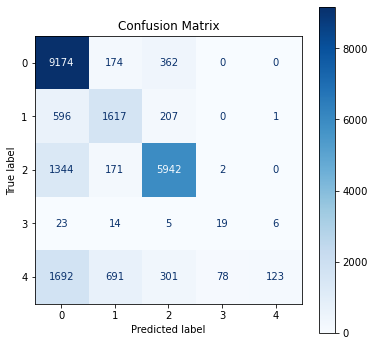

{'normal': 0, 'probe': 1, 'dos': 2, 'u2r': 3, 'r2l': 4}


In [22]:
# label_mapping = {'normal': 0, 'probe': 1, 'dos': 2, 'u2r': 3, 'r2l': 4}
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(knn, normalized_test_instances, test_df['numerical_attack_category'], ax=ax, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
print(label_mapping)

### (6) Lastly, please use the cost matrix for the KDD’99 contest to calculate your average cost score. Now you can compare your performance to other entries in that contest!

In [23]:
cost_matrix = np.array([[0, 1, 2, 2, 2],
                        [1, 0, 2, 2, 2],
                        [2, 1, 0, 2, 2],
                        [3, 2, 2, 0, 2],
                        [4, 2, 2, 2, 0]])

# Assuming you have a mapping of labels to indices in the cost matrix
label_mapping = {'normal': 0, 'probe': 1, 'dos': 2, 'u2r': 3, 'r2l': 4}

# Multiply the confusion matrix element-wise with the cost matrix
result_matrix = np.multiply(conf_matrix, cost_matrix)

# Calculate the total cost
total_cost = np.sum(result_matrix)

print("Total Cost:", total_cost)


Total Cost: 13800


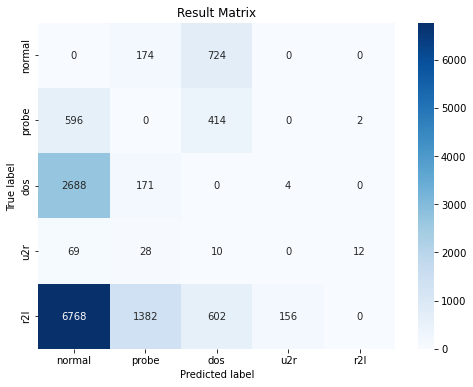

In [24]:
# label_mapping = {'normal': 0, 'probe': 1, 'dos': 2, 'u2r': 3, 'r2l': 4}
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(result_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Result Matrix')
plt.show()
